#Random Forest Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **Dataset**

In [3]:
df = pd.read_csv('dataset_.csv')

# Features and target

In [4]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['medical charges']


# Preprocessing pipeline for categorical and numerical data


In [5]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
    ])


# Create a pipeline with preprocessing and the model


In [6]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(n_estimators=100, random_state=42))])


# Split the data into training and testing sets

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', RandomForestRegressor(random_state=42))])

# Predict on the test set


In [8]:
y_pred = pipeline.predict(X_test)

# Evaluate the model


In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 21003637.60876614
R^2 Score: 0.8647097634425496


# 1. Predicted vs Actual Plot for Training Data

Text(0, 0.5, 'Predicted Medical Charges')

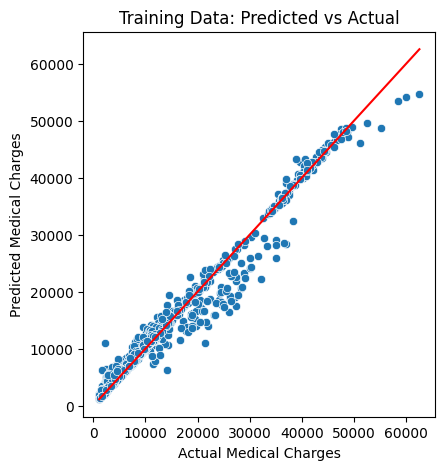

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')
plt.title('Training Data: Predicted vs Actual')
plt.xlabel('Actual Medical Charges')
plt.ylabel('Predicted Medical Charges')




# 2. Predicted vs Actual Plot for Testing Data


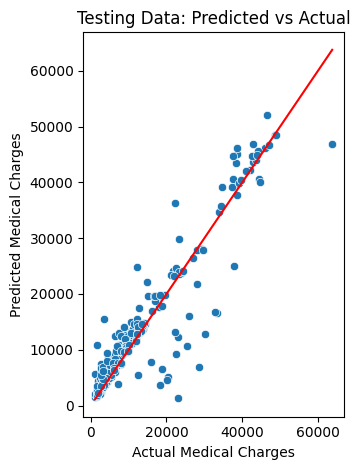

In [11]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Testing Data: Predicted vs Actual')
plt.xlabel('Actual Medical Charges')
plt.ylabel('Predicted Medical Charges')

plt.tight_layout()
plt.show()


# 3. Residuals Plot for Testing Data

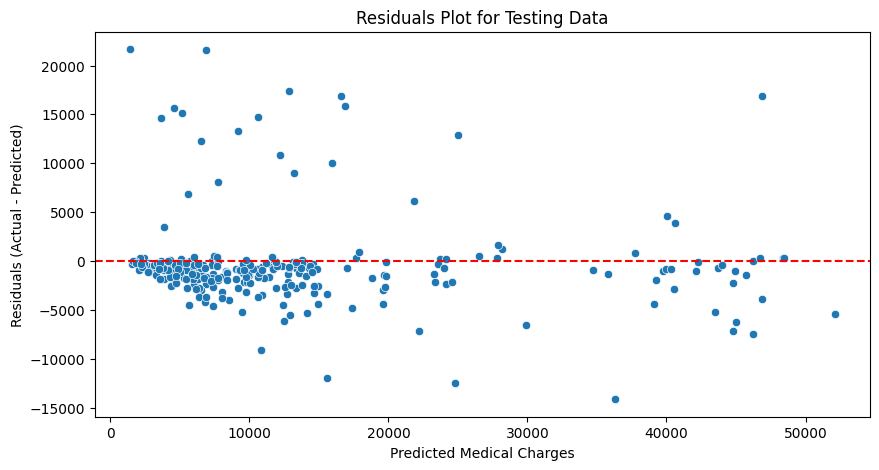

In [12]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test_pred, y=(y_test - y_test_pred))
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot for Testing Data')
plt.xlabel('Predicted Medical Charges')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

In [13]:
# Define the sample input
sample_data = pd.DataFrame({
    'age': [45],
    'sex': ['male'],
    'bmi': [28.5],
    'children': [2],
    'smoker': ['yes'],
    'region': ['southeast']
})

# Make a prediction using the trained pipeline
sample_prediction = pipeline.predict(sample_data)

# Output the prediction
print(f'Predicted medical charge for the sample input: ${sample_prediction[0]:.2f}')

Predicted medical charge for the sample input: $27302.48
